# Lab 1

In the first laboratory experience, a multiple linear regression problem will be faced using different parameters estimation approaches, and a comparison between them will be carried out. In particular, the considered techniques are: minimum square error, gradient descent, steepest descent and stochastic gradient descent.

The input dataset contains a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease. The main aim of the data is to predict the "total_UPDRS" feature from the 16 voice measures. For purely didactic purposes, also the "Jitter(%)" feature will be considered as a regressand.

As a preliminary step, some fundamental Python scientific libraries will be imported:
- <b>NumPy</b> is the fundamental package for scientific computing with Python. It containing, among other things, a powerful and efficient N-dimensional array object.
- <b>Pandas</b> provides high-performance, easy-to-use data structures and data analysis tools for Python, and it is built on top of NumPy. In this scope, it will be mainly used during the pre-processing phase.
- <b>Matplotlib</b> is a MATLAB-inspired 2D and 3D visualization library.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

Now, it is possible to read the data from file and give a look to their main features.

In [3]:
df = pd.read_csv("../Data/parkinsons_updrs.data")

In [4]:
df.shape

(5875, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

The dataset is small enough to give a deeper look to the main descriptive statistics of each column.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


From the description table, is it possible to notice that the feature "test_time" has some negative value which is supposed to be an error: those negative numbers will be taken in absolute value. Furthermore, the dataset will be compressed by averaging measurement taken over the same day, then splitted into training/testing data and finally standardized to have zero mean and unitary variance.

In [7]:
df.test_time = df.test_time.apply(np.abs)
df["day"] = df.test_time.astype(np.int64)
df = df.groupby(["subject#", "day"]).mean()

training_df = df.loc[df.index.get_level_values('subject#') <= 36, 
                     df.columns.difference(["day","age","sex","test_time"])]
testing_df = df.loc[df.index.get_level_values('subject#') > 36, 
                    df.columns.difference(["day","age","sex","test_time"])]

def standardize (x):
    return (x-x.mean())/x.std()

training_df_st = training_df.apply(standardize)
testing_df_st = testing_df.apply(standardize)

In order to limit code redundancy, it has been developed a linear regression "root" class which contains the common operations shared between all the considered parameters estimation techniques.

In [8]:
class LR (object):
    
    def __init__ (self, training_df_st, testing_df_st, y_col):

        self.y_col = y_col
        self.x_cols = training_df_st.columns.difference([y_col])
        
        self.train_df = training_df_st
        self.test_df = testing_df_st

        self.y_train = training_df_st[y_col].values
        self.X_train = training_df_st[self.x_cols].values

        self.y_test = testing_df_st[y_col].values
        self.X_test = testing_df_st[self.x_cols].values

        self.e_train = 0.0
        self.e_test = 0.0

    def train (self):        
        pass

    def test (self):
        
        self.yhat_test = self.X_test.dot(self.a)
        self.e_test = np.linalg.norm(self.yhat_test - self.y_test)**2

The classes implementing parameters estimation techniques inherit from LR class and implement opportunely the <i>train</i> method. The MSE approach minimizes the sum of squared residuals, and leads to a closed-form expression for the estimated value of the unknown parameter. The GD, SD and SGD approaches are instead first-order iterative optimization methods and require to appropriately set a number of parameters such as the learning coefficient for the Lagrangian and a stopping rule. In the case of SGD, it has been additionally used a batch-based approach through every iteration, and it has been necessary to set also the batch size.

In [9]:
a_0 = np.random.rand(len(training_df_st.columns)-1)

class LR (object):
    
    def __init__ (self, training_df_st, testing_df_st, y_col):

        self.y_col = y_col
        self.x_cols = training_df_st.columns.difference([y_col])
        
        self.train_df = training_df_st
        self.test_df = testing_df_st

        self.y_train = training_df_st[y_col].values
        self.X_train = training_df_st[self.x_cols].values

        self.y_test = testing_df_st[y_col].values
        self.X_test = testing_df_st[self.x_cols].values

        self.e_train = 0.0
        self.e_test = 0.0

        self.a = a_0

    def train (self):        
        pass

    def test (self):
        
        self.yhat_test = self.X_test.dot(self.a)
        self.e_test = np.linalg.norm(self.yhat_test - self.y_test)**2
        
class MSE_LR (LR):
    
    def train (self):
        
        self.a = np.dot(np.linalg.pinv(self.X_train), self.y_train)
        self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2
        self.yhat_train = self.X_train.dot(self.a)
        
class GD_LR (LR):
    
    def train (self):
        
        def _gradient (X, y, a):
            return -2 * X.T.dot(y) + 2 * X.T.dot(X).dot(a)
        
        learning_coefficient = 1.0e-4
        a_prev = np.ones(len(self.x_cols))
        self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2
        gradient = _gradient(self.X_train, self.y_train, self.a)
        iterations = 0
        max_iterations = 1e4
        self.e_history = []
        
        while np.linalg.norm(self.a-a_prev) > 1e-8 and iterations < max_iterations:
            iterations += 1
            self.e_history += [self.e_train]                                           

            a_prev = self.a
            self.a = self.a - learning_coefficient * gradient
            self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2
            gradient = _gradient(self.X_train, self.y_train, self.a)        
        self.yhat_train = self.X_train.dot(self.a)
            
class SD_LR (LR):
    
    def train (self):
        
        def _gradient (X, y, a):
            return -2 * X.T.dot(y) + 2 * X.T.dot(X).dot(a)
        def _hessian (X):
            return 4 * X.T.dot(X)
        
        a_prev = np.ones(len(self.x_cols))
        self.yhat_train = self.X_train.dot(a_prev)
        self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2
        gradient = _gradient(self.X_train, self.y_train, self.a)
        hessian = _hessian(self.X_train)
        iterations = 0
        max_iterations = 1e4
        self.e_history = []
        
        while np.linalg.norm(self.a-a_prev) > 1e-8 and iterations < max_iterations:
            iterations += 1

            self.e_history += [self.e_train]                                           

            a_prev = self.a
            learning_coefficient = \
                (np.linalg.norm(gradient)**2)/(gradient.T.dot(hessian).dot(gradient))
            self.a = self.a - learning_coefficient * gradient
            self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2
            gradient = _gradient(self.X_train, self.y_train, self.a)        
        self.yhat_train = self.X_train.dot(self.a)
            
class SGD_LR (LR):
    
    def train (self):
                
        def _gradient (X, y, a):
            return -2 * X.T.dot(y) + 2 * X.T.dot(X).dot(a)

        learning_coefficient = 1.0e-4
        self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2
        iterations = 0
        max_iterations = 1e4
        self.e_history = [np.linalg.norm(self.X_train.dot(a_0) - self.y_train)**2]
        
        batch_size = 20
        self.shuffled = self.train_df.sample(frac=1)
        
        while iterations < max_iterations:
            iterations += 1
                                            
            self.shuffled = self.shuffled.sample(frac=1)
            self.y_train = self.shuffled[self.y_col].values
            self.X_train = self.shuffled[self.x_cols].values

            batch_prev = 0
            for batch in range(batch_size, len(self.X_train), batch_size):
            
                X_batch = self.X_train[batch_prev:batch]
                y_batch = self.y_train[batch_prev:batch]
                batch_gradient = _gradient(X_batch, y_batch, self.a)
        
                self.a = self.a - learning_coefficient * batch_gradient
                batch_prev = batch

            self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2
            self.e_history += [self.e_train]
            
        self.yhat_train = self.train_df[self.x_cols].values.dot(self.a)
        self.e_train = np.linalg.norm(self.X_train.dot(self.a) - self.y_train)**2

def run_LR (y_col):

    mse = MSE_LR(training_df_st, testing_df_st, y_col)
    mse.train()
    mse.test()

    gd = GD_LR(training_df_st, testing_df_st, y_col)
    gd.train()
    gd.test()

    sd = SD_LR(training_df_st, testing_df_st, y_col)
    sd.train()
    sd.test()

    sgd = SGD_LR(training_df_st, testing_df_st, y_col)
    sgd.train()
    sgd.test()
    
    return mse, gd, sd, sgd
    
mse, gd, sd, sgd = run_LR("Jitter(%)")

The following plot shows the values of regression parameters obtained with the described methods for the feature "Jitter(%)". It is possible to observe that in the case of iterative methods, all the coefficients are nearly zero, while in the case of MSE there are coefficients with larger absolute values. This behaviour might more likely create numerical problems, altough MSE approach is simple, does not require parameters tuning and might work well in most cases.

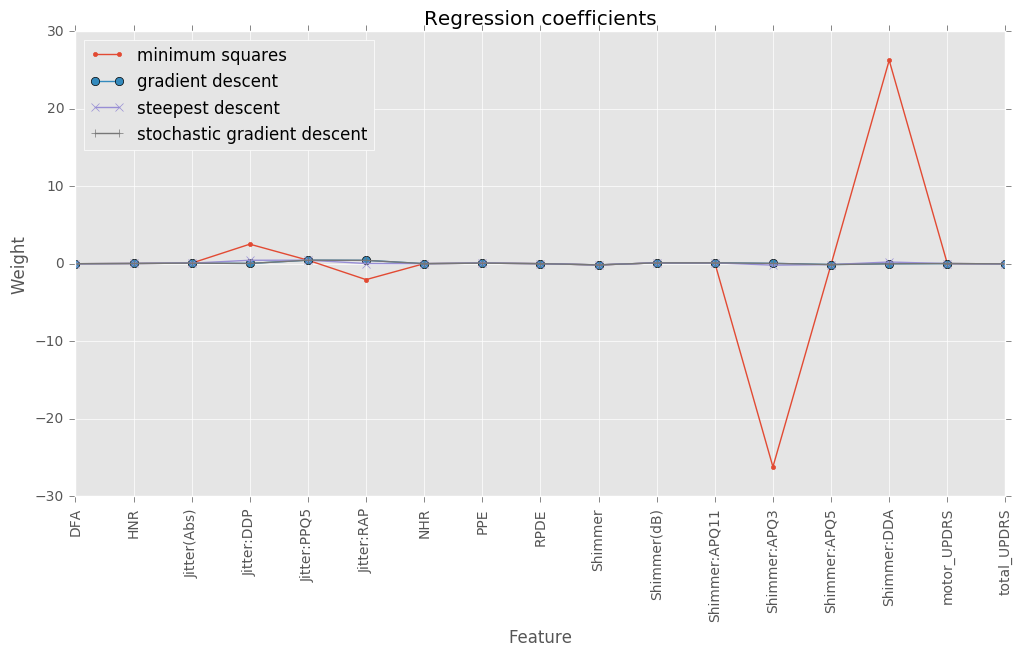

In [10]:
def plot_weights ():
    
    plt.figure(figsize=(12,6))
    plt.plot(mse.a, marker=".", label="minimum squares")
    plt.plot(gd.a, marker="o", label="gradient descent")
    plt.plot(sd.a, marker="x", label="steepest descent")
    plt.plot(sgd.a, marker="+", label="stochastic gradient descent")
    plt.xticks(range(len(mse.a)), mse.x_cols, rotation="vertical")
    plt.title("Regression coefficients")
    plt.xlabel("Feature")
    plt.ylabel("Weight")
    plt.legend(loc=0)

plot_weights()

In order to compare the iterative methods, the first 100 iterations of the optimization process have been plotted together in the next chart. It possible to notice that GD converges significantly more slowly than the other methods in terms of number of iterations, and that the SGD performs slightly better than SD. Nevertheless, SGD iterations are slower than GD ones in terms of time, because in each "epoch" SGD has to iterate over batches taken from a shuffled version of the training dataset. Clearly, different parameters tuning and input dataset with more variegated charateristics may lead to different results.

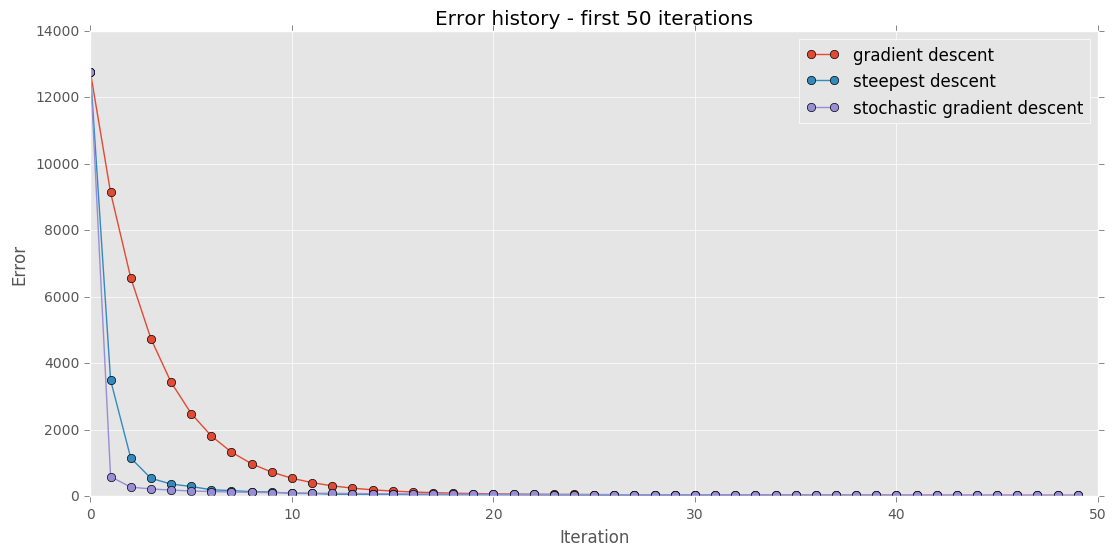

In [11]:
def plot_optimization ():
    
    plt.figure(figsize=(13,6))
    plt.plot(gd.e_history[:50], marker="o", label="gradient descent")
    plt.plot(sd.e_history[:50], marker="o", label="steepest descent")
    plt.plot(sgd.e_history[:50], marker="o", label="stochastic gradient descent")
    plt.title("Error history - first 50 iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.legend(loc=0)

plot_optimization()

In the next charts, predictions of training and testing are plotted against the true y values, in order to qualitatively assess the goodness of predictions for the different techniques. From the charts, it looks that the algorithms are performing very similarly, probably also because the input dataset is not very big and does not contain particular features which can lead to numerical issues.

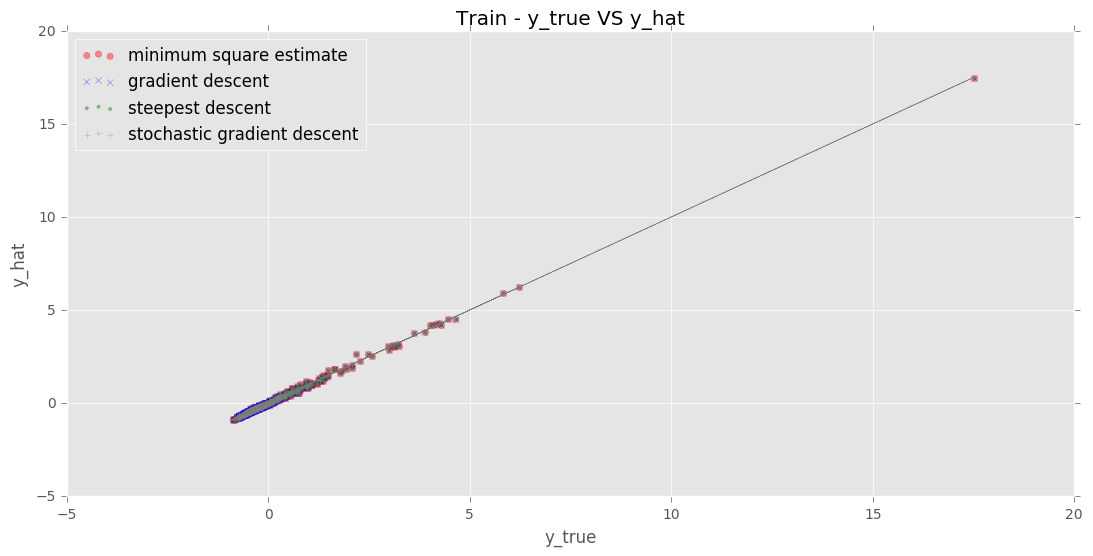

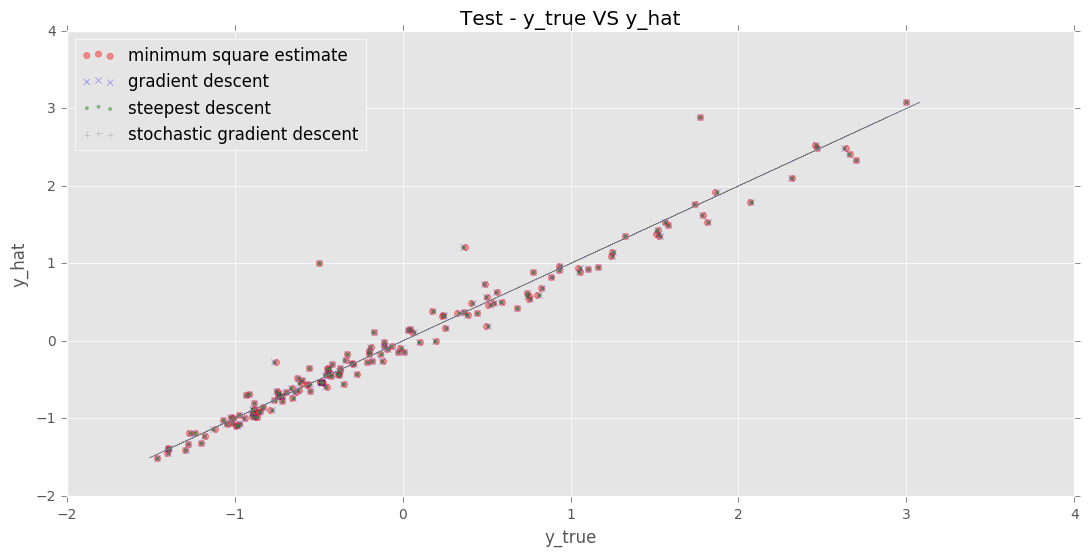

In [12]:
def plot_yhat_vs_ytrue (y_col):
    
    plt.figure(figsize=(13,6))
    plt.scatter(mse.yhat_train, mse.y_train, label="minimum square estimate", marker="o", color="red", alpha=0.4)
    plt.plot(mse.y_train, mse.y_train, linewidth=0.2)
    plt.scatter(gd.yhat_train, gd.y_train, label="gradient descent", marker="x", color="blue", alpha=0.4)
    plt.plot(gd.y_train, gd.y_train, linewidth=0.2)
    plt.scatter(sd.yhat_train, sd.y_train, label="steepest descent", marker=".", color="green", alpha=0.4)
    plt.plot(sd.y_train, sd.y_train, linewidth=0.2)
    plt.scatter(sgd.yhat_train, sgd.train_df[y_col].values, label="stochastic gradient descent", marker="+", color="grey", alpha=0.4)
    plt.plot(sgd.y_train, sgd.y_train, linewidth=0.2)
    plt.title("Train - y_true VS y_hat")
    plt.xlabel("y_true")
    plt.ylabel("y_hat")
    plt.legend(loc=2)

    plt.figure(figsize=(13,6))
    plt.scatter(mse.yhat_test, mse.y_test, label="minimum square estimate", marker="o", color="red", alpha=0.4)
    plt.plot(mse.y_test, mse.y_test, linewidth=0.2)
    plt.scatter(gd.yhat_test, gd.y_test, label="gradient descent", marker="x", color="blue", alpha=0.4)
    plt.plot(gd.y_test, gd.y_test, linewidth=0.2)
    plt.scatter(sd.yhat_test, sd.y_test, label="steepest descent", marker=".", color="green", alpha=0.4)
    plt.plot(sd.y_test, sd.y_test, linewidth=0.2)
    plt.scatter(sgd.yhat_test, sgd.y_test, label="stochastic gradient descent", marker="+", color="grey", alpha=0.4)
    plt.plot(sgd.y_test, sgd.y_test, linewidth=0.2)
    plt.title("Test - y_true VS y_hat")
    plt.xlabel("y_true")
    plt.ylabel("y_hat")
    plt.legend(loc=2)

plot_yhat_vs_ytrue("Jitter(%)")

The last tool used to graphically inspect the quality of predictions is an histogram of errors. Also in this case, the performances appear to be quite similar.

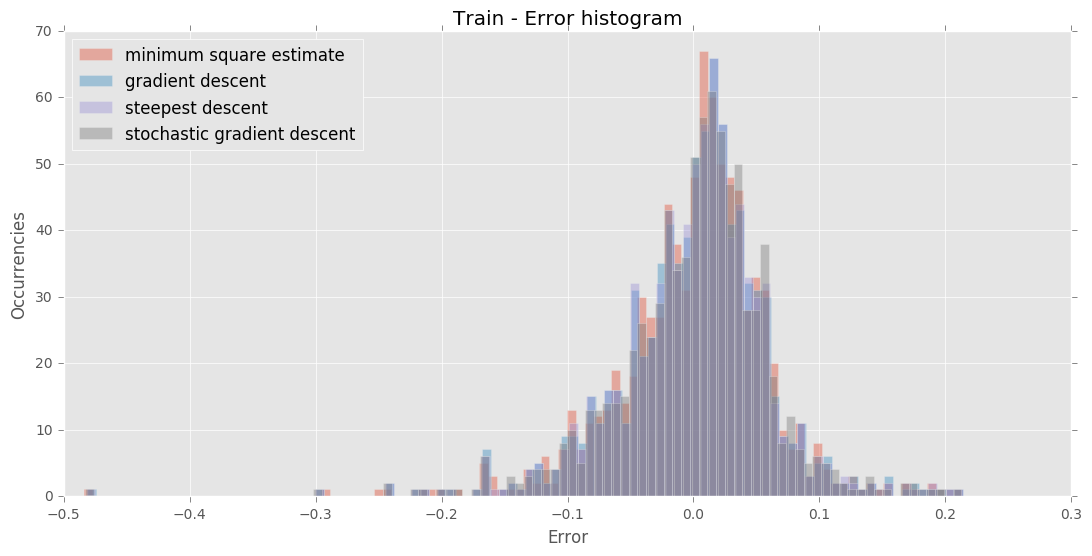

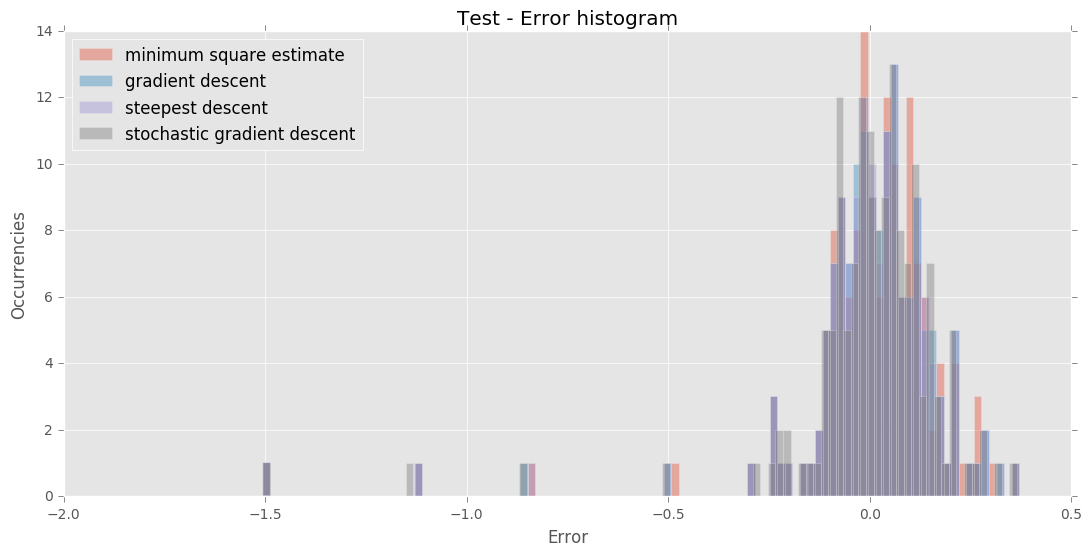

In [13]:
def plot_errors_histogram (y_col):

    plt.figure(figsize=(13,6))
    plt.hist(mse.yhat_train-mse.y_train, bins=100, label="minimum square estimate", alpha=0.4)
    plt.hist(gd.yhat_train-gd.y_train, bins=100, label="gradient descent", alpha=0.4)
    plt.hist(sd.yhat_train-sd.y_train, bins=100, label="steepest descent", alpha=0.4)
    plt.hist(sgd.yhat_train-sgd.train_df[y_col].values, bins=100, label="stochastic gradient descent", alpha=0.4)
    plt.title("Train - Error histogram")
    plt.xlabel("Error")
    plt.ylabel("Occurrencies")
    plt.legend(loc=2)

    plt.figure(figsize=(13,6))
    plt.hist(mse.yhat_test-mse.y_test, bins=100, label="minimum square estimate", alpha=0.4)
    plt.hist(gd.yhat_test-gd.y_test, bins=100, label="gradient descent", alpha=0.4)
    plt.hist(sd.yhat_test-sd.y_test, bins=100, label="steepest descent", alpha=0.4)
    plt.hist(sgd.yhat_test-sgd.y_test, bins=100, label="stochastic gradient descent", alpha=0.4)
    plt.title("Test - Error histogram")
    plt.xlabel("Error")
    plt.ylabel("Occurrencies")
    plt.legend(loc=2)

plot_errors_histogram("Jitter(%)")

For which concerns the feature "total_UPDRS", the considerations about the similarity of results seem to hold, but the prediction problem looks more difficult: the predicted values are farther from true values, and the magnitude of errors is visibly larger.

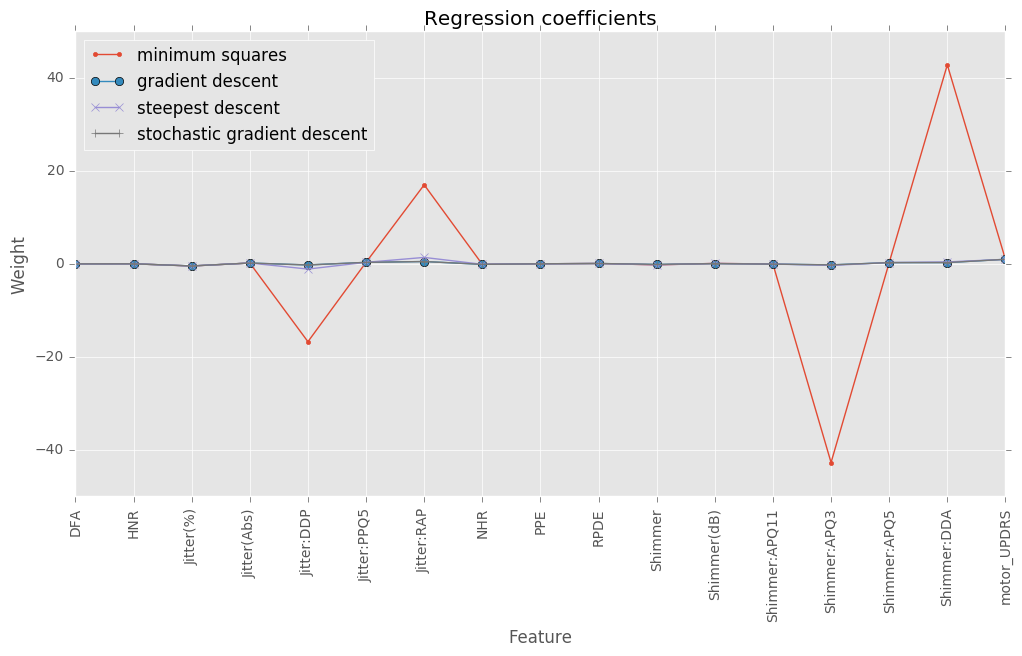

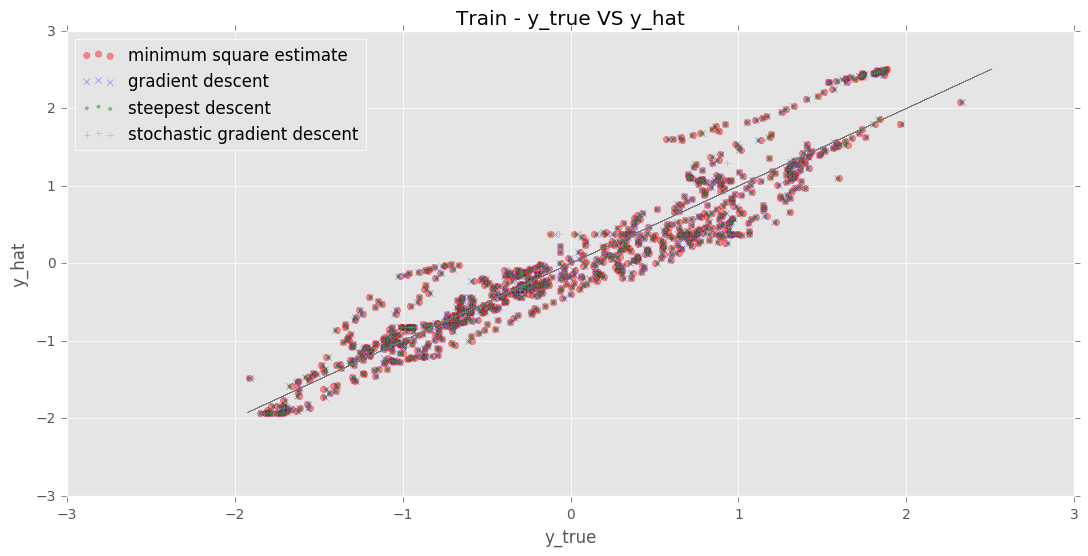

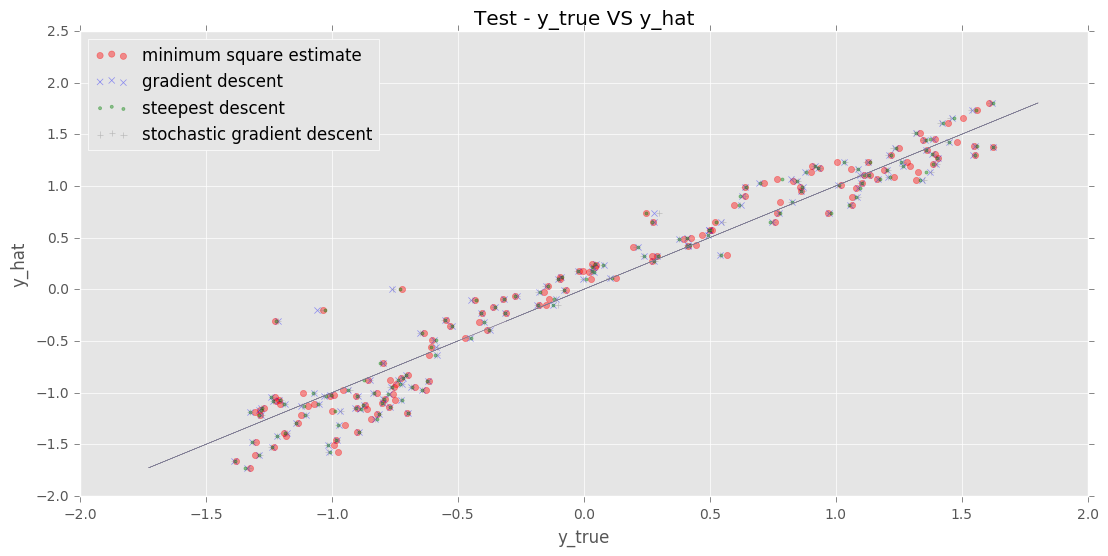

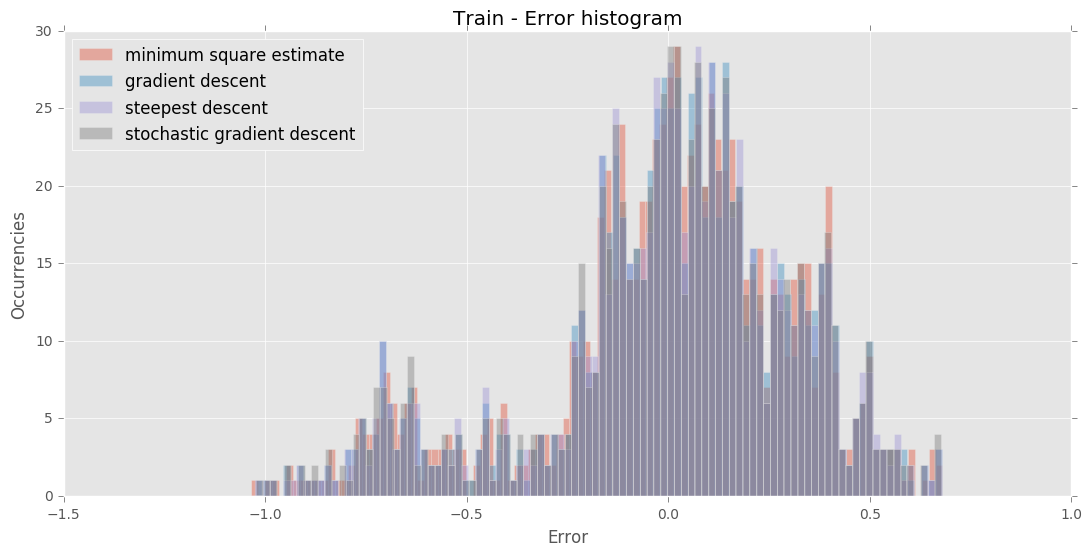

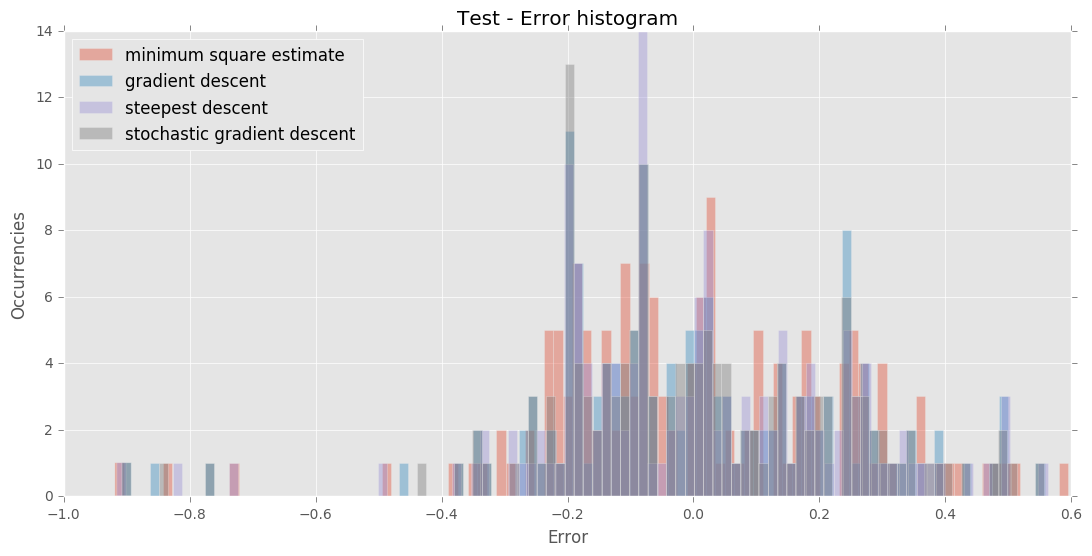

In [14]:
mse, gd, sd, sgd = run_LR("total_UPDRS")
plot_weights()
plot_yhat_vs_ytrue("total_UPDRS")
plot_errors_histogram("total_UPDRS")

# Lab 2

The second laboratory experience focuses on Principal Component Analysis and Principal Component Regression. The regression problem and the input dataset considered are the same of the previous laboratory experience, but instead of comparing MSE with iterative algorithms for parameter estimation, a dimensionality reduction will be performed using different level of approximation. The class implementing the PCR differs from previous ones for the presence of the L parameter, which represents the number of features to use to eventually reduce the dimension of the problem. Also the <i>train</i> method is obviously different, because it implements the regression using the PCA as a preliminary step. The PCR will be executed three times: the first one using all the regressors, while the second and third using a number of regressors which will retain respectively the 99.9% and the 97% of the original variance.

In [15]:
class PC_LR(object):
    
    def __init__ (self, training_df_st, testing_df_st, y_col, L):

        self.L = L
        
        self.y_col = y_col
        self.x_cols = training_df_st.columns.difference([y_col])
        
        self.train_df = training_df_st
        self.test_df = testing_df_st

        self.y_train = training_df_st[y_col].values
        self.X_train = training_df_st[self.x_cols].values

        self.y_test = testing_df_st[y_col].values
        self.X_test = testing_df_st[self.x_cols].values

    def train(self):

        def cov_matrix (x, n):
            return 1.0/n * x.T.dot(x)

        def weights_PCR (x, y, U, A, N):
            return 1.0/N * (U.dot(np.linalg.inv(A).dot(U.T))).dot((x.T).dot(y))
        
        N = float(len(self.X_train))
        RX = cov_matrix(self.X_train, N)
        self.eigvals, U = np.linalg.eig(RX)
        A = np.diag(self.eigvals)[:self.L-1, :self.L-1]
        U = U[:, :self.L-1]
        self.a = weights_PCR(self.X_train, self.y_train, U, A, N)
        self.yhat_train = self.X_train.dot(self.a)
        self.e_train = np.linalg.norm(self.yhat_train - self.y_train)**2

        return self.a

    def test (self):
        
        self.yhat_test = self.X_test.dot(self.a)
        self.e_test = np.linalg.norm(self.yhat_test - self.y_test)**2

        return self.yhat_test
    
def run_PCR (y_col):

    mse = MSE_LR(training_df_st, testing_df_st, y_col)
    mse.train()
    mse.test()    
    
    pcrF = PC_LR(training_df_st, testing_df_st, y_col, len(training_df_st.columns)+1)
    pcrF.train()
    pcrF.test()

    L1 = len(np.where(pcrF.eigvals.cumsum() < pcrF.eigvals.sum() * 0.999)[0])
    L2 = len(np.where(pcrF.eigvals.cumsum() < pcrF.eigvals.sum() * 0.97)[0])
    print L1, L2
    
    pcrL1 = PC_LR(training_df_st, testing_df_st, y_col, L1)
    pcrL1.train()
    pcrL1.test()

    pcrL2 = PC_LR(training_df_st, testing_df_st, y_col, L2)
    pcrL2.train()
    pcrL2.test()
    
    return mse, pcrF, pcrL1, pcrL2

mse, pcrF, pcrL1, pcrL2 = run_PCR("Jitter(%)")

11 6


The charts and the code used to show the results are the same of the previous exercise, exception made for a bar plot representing the residual error for training and testing for each method considered. MSE and PCR with full features are plotted separately, but they always coincide.

In the case of the feature "Jitter(%)", the prediction points in the case of L2 are visibly far from the bisector corresponding to a perfect prediction, and the values of the errors in the histogram are much larger than in the case of full features and L1. 
For which concerns the testing phase, the error in the case of PCR - L1 and PCR - L2 is lower than in the case of MSE. This phenomenon is the main advantage of the PCR: using only the most informative features, it is possible to reduce the effect of multicollinearity and variance on the prediction performances, while also reducing the number of features needed for the analysis, namely the complexity in terms of memory. Clearly, this effect presents limitations due to nature of the input data and to the amount of eliminated features: when the choosen L is too small with respect to the total number of feature F, the PCR loses its advantages and perform poorly in terms of prediction, because also meaningful features are cancelled.

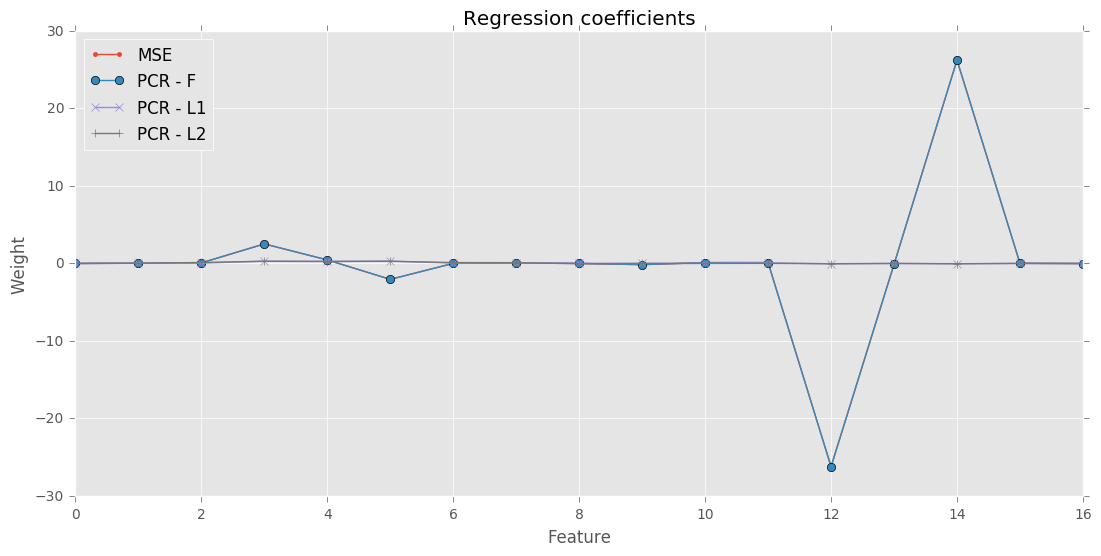

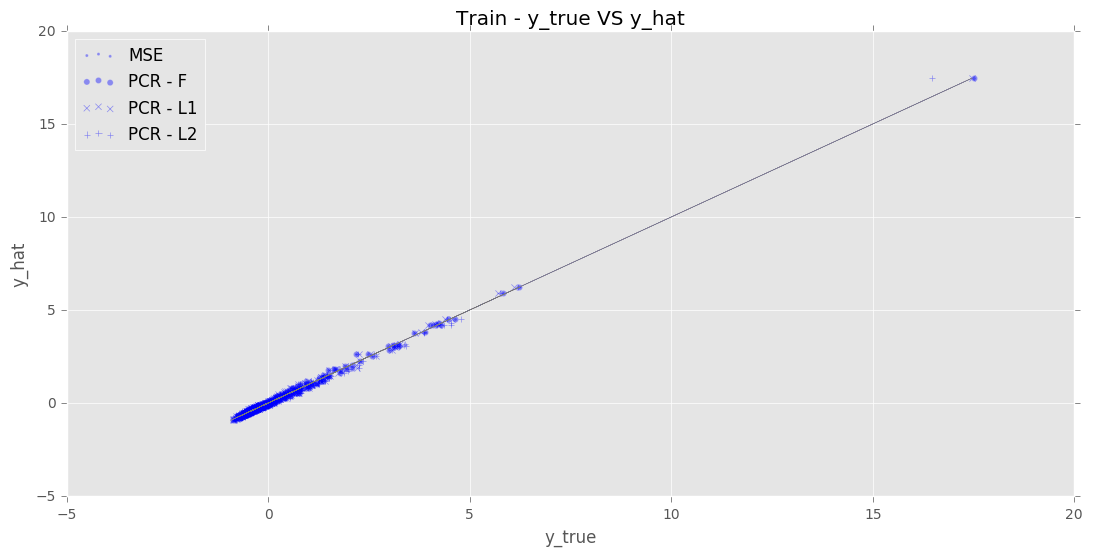

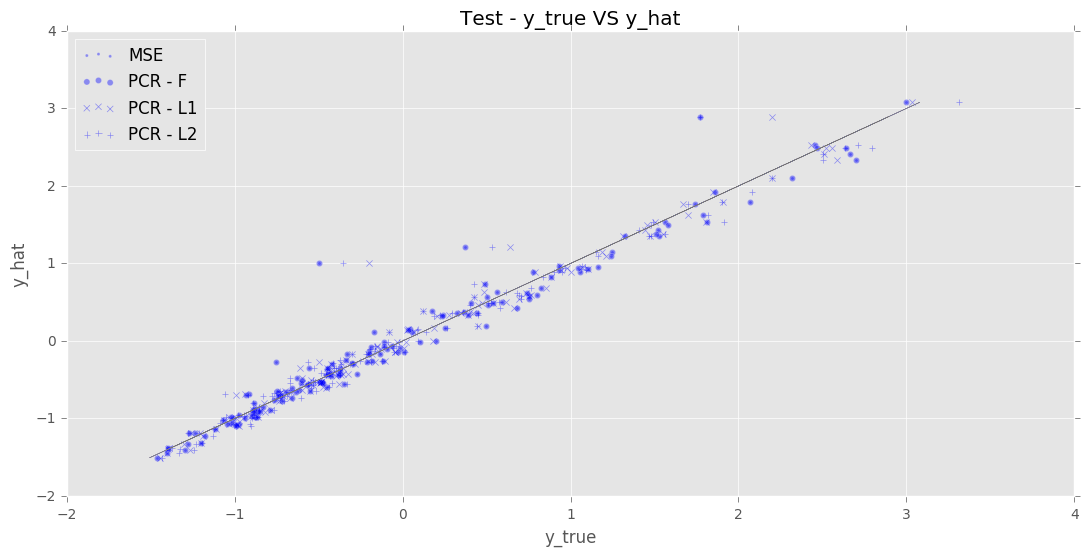

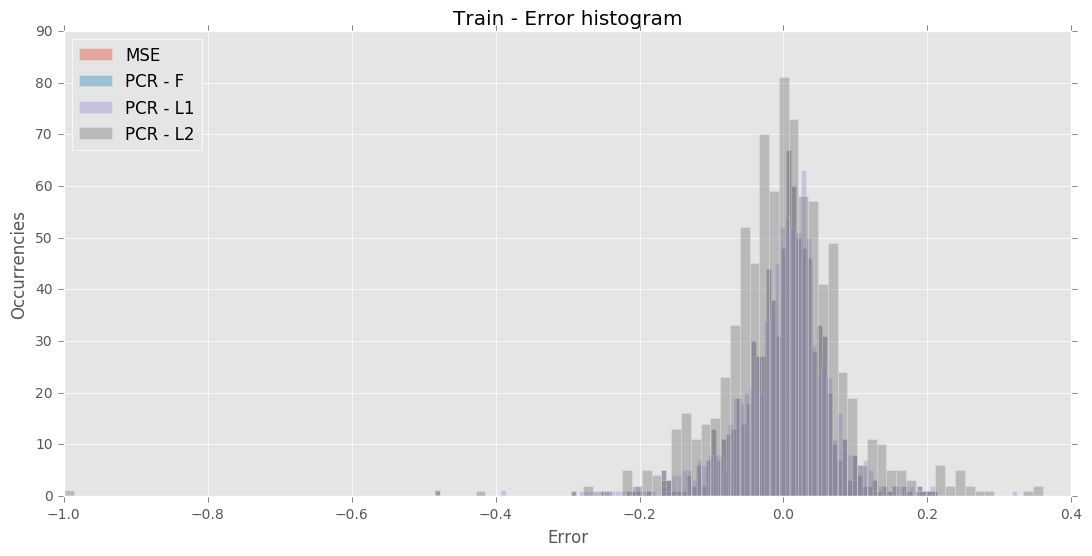

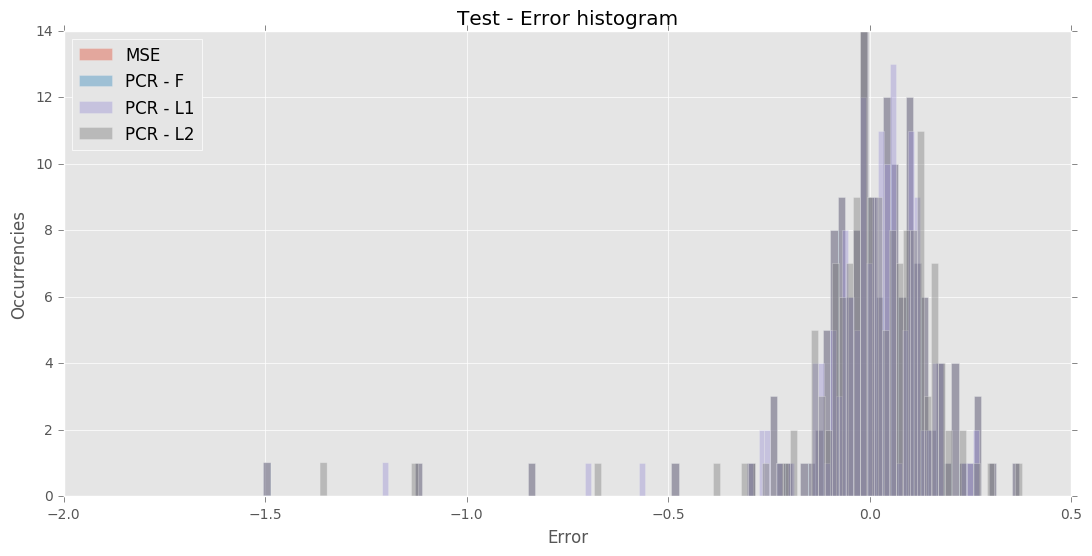

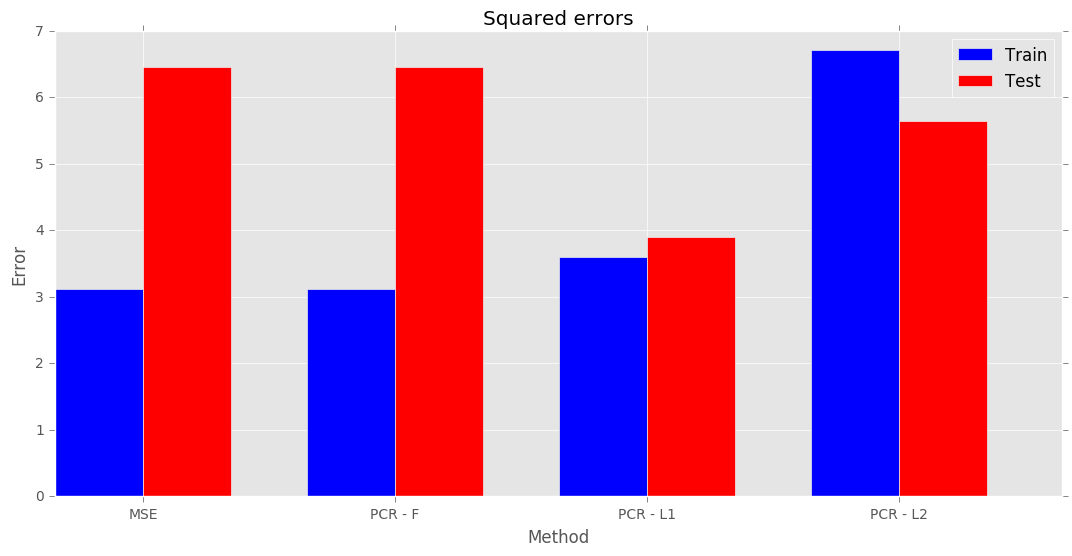

In [16]:
def plot_PCR_results ():
    
    plt.figure(figsize=(13,6))
    plt.plot(mse.a, marker=".", label="MSE")
    plt.plot(pcrF.a, marker="o", label="PCR - F")
    plt.plot(pcrL1.a, marker="x", label="PCR - L1")
    plt.plot(pcrL2.a, marker="+", label="PCR - L2")
    plt.title("Regression coefficients")
    plt.xlabel("Feature")
    plt.ylabel("Weight")
    plt.legend(loc=2)

    plt.figure(figsize=(13,6))
    plt.scatter(mse.yhat_train, mse.y_train, label="MSE", marker=".", alpha=0.4)
    plt.plot(mse.y_train, mse.y_train, linewidth=0.2)
    plt.scatter(pcrF.yhat_train, pcrF.y_train, label="PCR - F", marker="o", alpha=0.4)
    plt.plot(pcrF.y_train, pcrF.y_train, linewidth=0.2)
    plt.scatter(pcrL1.yhat_train, pcrL1.y_train, label="PCR - L1", marker="x", alpha=0.4)
    plt.plot(pcrL1.y_train, pcrL1.y_train, linewidth=0.2)
    plt.scatter(pcrL2.yhat_train, pcrL2.y_train, label="PCR - L2", marker="+", alpha=0.4)
    plt.plot(pcrL2.y_train, pcrL2.y_train, linewidth=0.2)
    plt.title("Train - y_true VS y_hat")
    plt.xlabel("y_true")
    plt.ylabel("y_hat")
    plt.legend(loc=2)

    plt.figure(figsize=(13,6))
    plt.scatter(mse.yhat_test, mse.y_test, label="MSE", marker=".", alpha=0.4)
    plt.plot(mse.y_test, mse.y_test, linewidth=0.2)
    plt.scatter(pcrF.yhat_test, pcrF.y_test, label="PCR - F", marker="o", alpha=0.4)
    plt.plot(pcrF.y_test, pcrF.y_test, linewidth=0.2)
    plt.scatter(pcrL1.yhat_test, pcrL1.y_test, label="PCR - L1", marker="x", alpha=0.4)
    plt.plot(pcrL1.y_test, pcrL1.y_test, linewidth=0.2)
    plt.scatter(pcrL2.yhat_test, pcrL2.y_test, label="PCR - L2", marker="+", alpha=0.4)
    plt.plot(pcrL2.y_test, pcrL2.y_test, linewidth=0.2)
    plt.title("Test - y_true VS y_hat")
    plt.xlabel("y_true")
    plt.ylabel("y_hat")
    plt.legend(loc=2)

    plt.figure(figsize=(13,6))
    plt.hist(mse.yhat_train-mse.y_train, bins=100, label="MSE", alpha=0.4)
    plt.hist(pcrF.yhat_train-pcrF.y_train, bins=100, label="PCR - F", alpha=0.4)
    plt.hist(pcrL1.yhat_train-pcrL1.y_train, bins=100, label="PCR - L1", alpha=0.4)
    plt.hist(pcrL2.yhat_train-pcrL2.y_train, bins=100, label="PCR - L2", alpha=0.4)
    plt.title("Train - Error histogram")
    plt.xlabel("Error")
    plt.ylabel("Occurrencies")
    plt.legend(loc=2)

    plt.figure(figsize=(13,6))
    plt.hist(mse.yhat_test-mse.y_test, bins=100, label="MSE", alpha=0.4)
    plt.hist(pcrF.yhat_test-pcrF.y_test, bins=100, label="PCR - F", alpha=0.4)
    plt.hist(pcrL1.yhat_test-pcrL1.y_test, bins=100, label="PCR - L1", alpha=0.4)
    plt.hist(pcrL2.yhat_test-pcrL2.y_test, bins=100, label="PCR - L2", alpha=0.4)
    plt.title("Test - Error histogram")
    plt.xlabel("Error")
    plt.ylabel("Occurrencies")
    plt.legend(loc=2)

    plt.figure(figsize=(13,6))
    index = np.arange(0,4,1)
    xticks = ["MSE",
              "PCR - F", 
              "PCR - L1", 
              "PCR - L2"]
    train_errors = [mse.e_train, pcrF.e_train, pcrL1.e_train, pcrL2.e_train]
    test_errors = [mse.e_test, pcrF.e_test, pcrL1.e_test, pcrL2.e_test]
    plt.bar(index, train_errors, 0.35, label="Train", color="blue")
    plt.bar(index + 0.35, test_errors, 0.35, label="Test", color="red")
    plt.title("Squared errors")
    plt.xlabel("Method")
    plt.ylabel("Error")
    plt.xticks(index + 0.35, xticks)
    plt.legend(loc=1)

plot_PCR_results()

When considering as regressand the feature "motor_UPDRS", as observed in the previous exercise, the amplitude of errors are in general bigger, being the prediction more difficult to be done with the same features: MSE and PCR tuned on L1 features perform worse than in case of the feature "Jitter(%)". Despite this, it is still possible to notice that PCR improves the final prediction error.

10 5


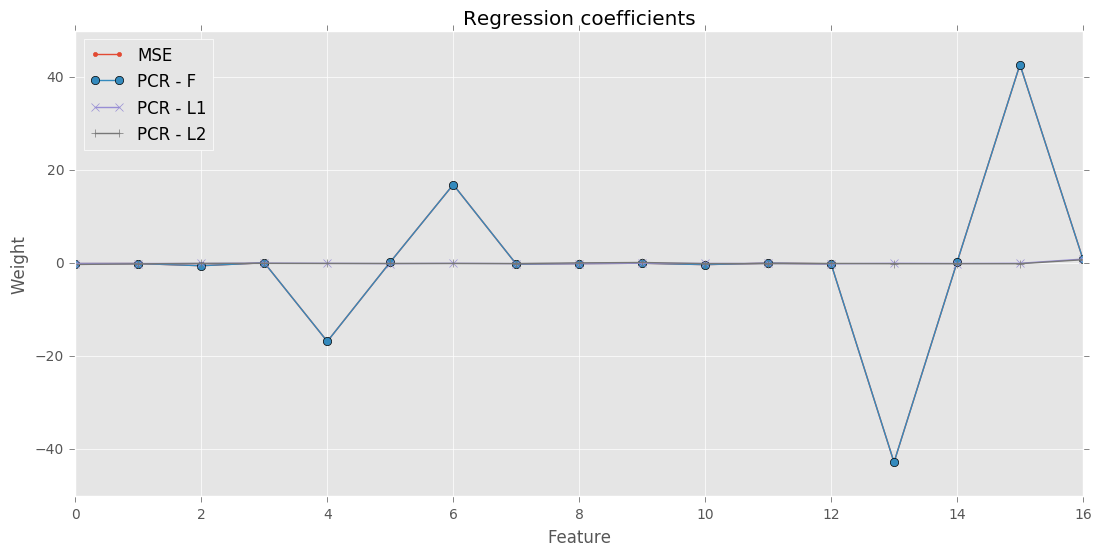

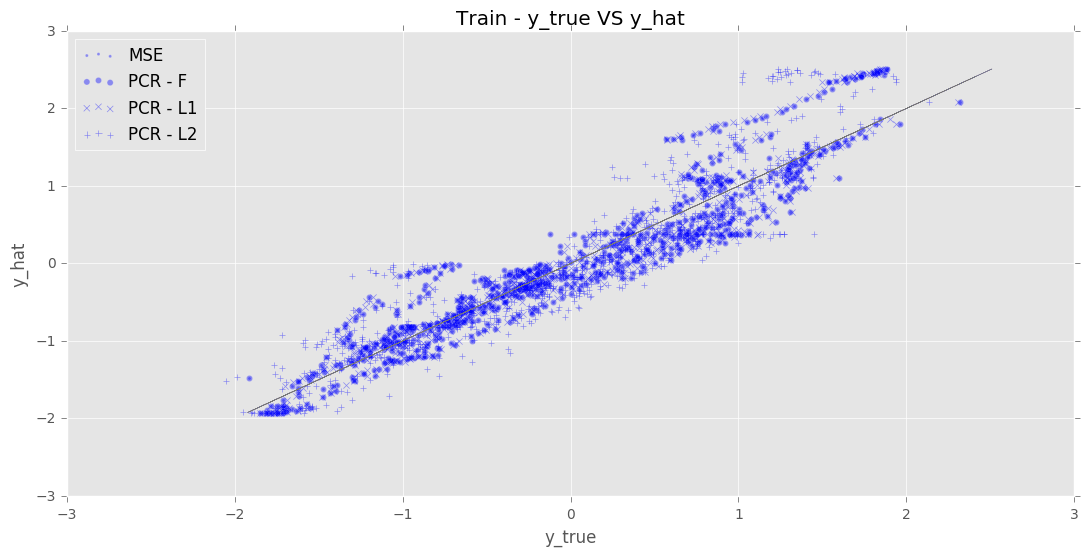

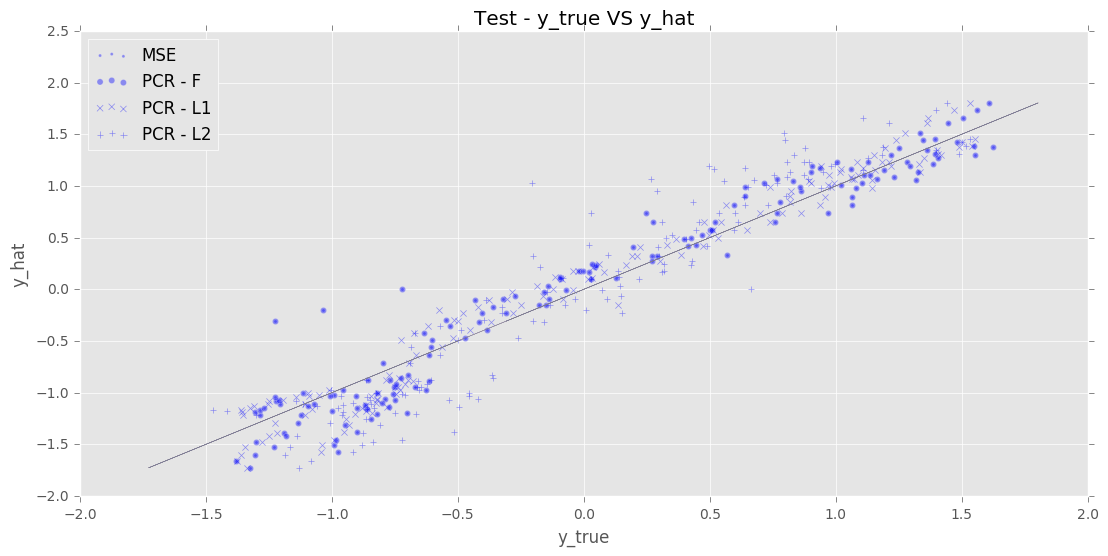

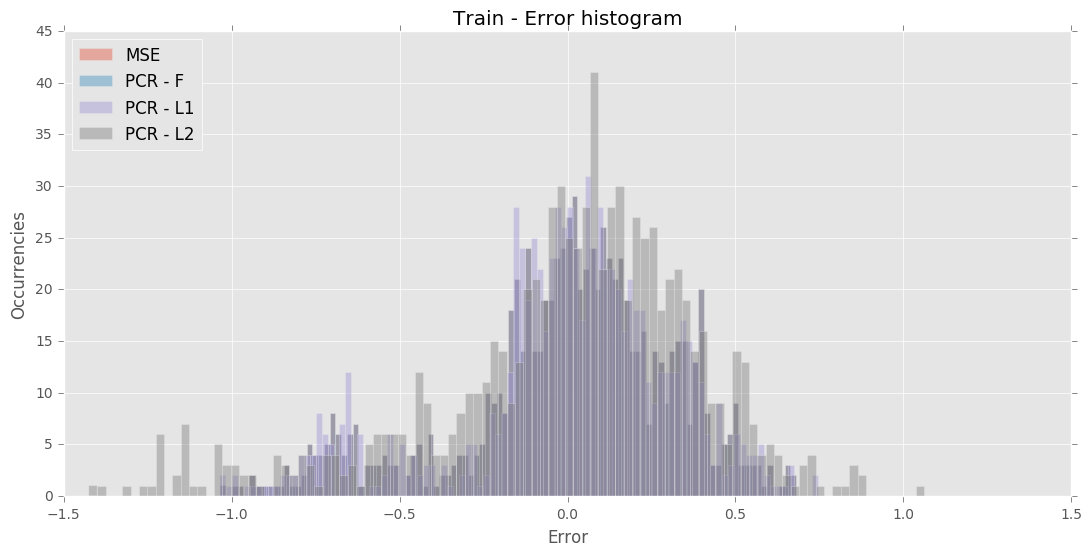

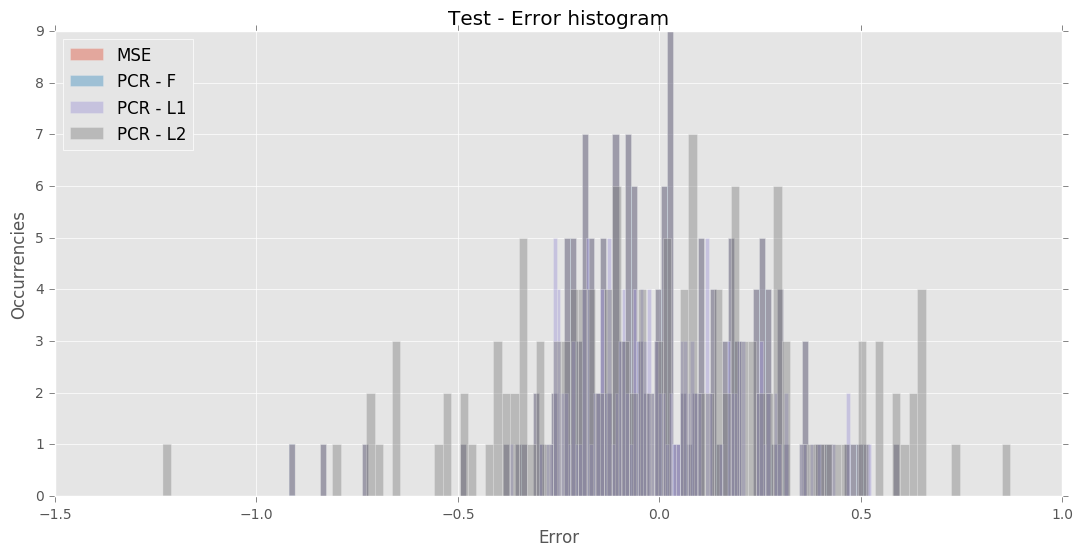

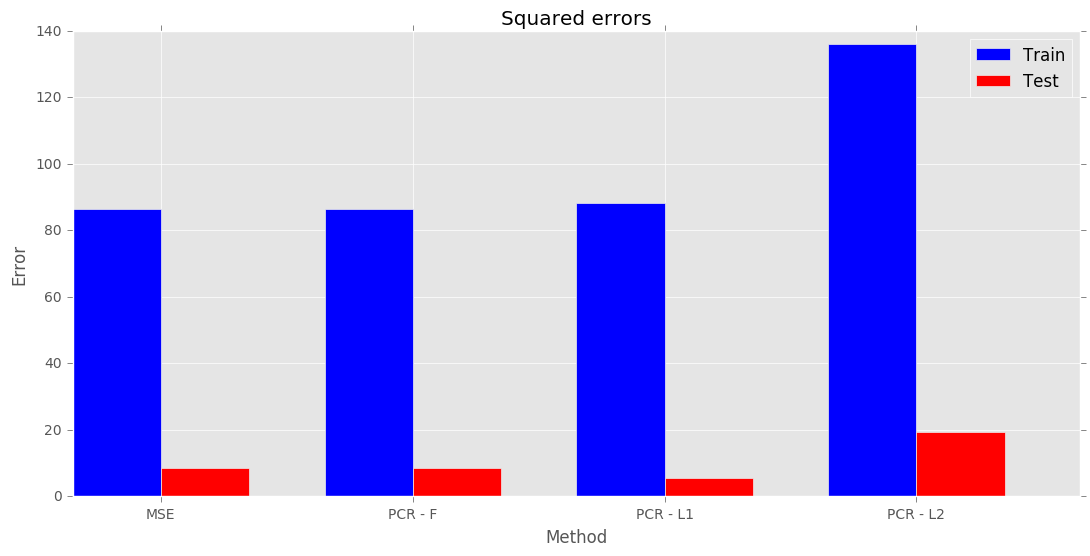

In [17]:
mse, pcrF, pcrL1, pcrL2 = run_PCR("total_UPDRS")
plot_PCR_results()